In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 데이터프레임 생성

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949')
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [ ]:
# 결측치 확인
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [ ]:
# 자료형 확인
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

In [ ]:
# 자료형태 확인
df.shape

(42699, 14)

In [ ]:
# 컬럼별 데이터 확인 nunique, unique
for i in df.columns:
    print(i,df[i].nunique())
print('\n')
for i in df.columns:
    print(i,df[i].unique(), '\n')

일련번호 42699
시장/마트 번호 102
시장/마트 이름 102
품목 번호 81
품목 이름 75
실판매규격 3012
가격(원) 1341
년도-월 6
비고 4129
시장유형 구분(시장/마트) 코드 2
시장유형 구분(시장/마트) 이름 2
자치구 코드 25
자치구 이름 25
점검일자 11


일련번호 [1673336 1667985 1666935 ... 1636114 1636113 1636121] 

시장/마트 번호 [  2 228   1  25   6  10  51 207  32 109  22  16  56  42  86  38  20  40
  62  85  82  98  88  21  90  84  63  80  68  78  66 100  72  31 133 102
 103  74 200 120 145 218 130 127 121  27  96  94  60  75  28  44 108  53
  73  45 212  33 223 129 219 115  55  19  11 140 114 210 224 110  26 147
 214 148  49 116 151  92 221 205 123 216 134  13 215 135 136 213   8 146
  14 220  15 153 154 199 222  91 206 227 225 226] 

시장/마트 이름 ['신세계백화점' '방배종합시장' '통인시장' '방학동도깨비시장' '이마트 용산점' '용문시장' 'NC백화점 불광점'
 '관악신사시장(신림4동)' '영천시장' '고척근린시장' '이마트 여의도점' '현대백화점 미아점' '롯데백화점' '이마트 가양점'
 '홈플러스 동대문점' '송화시장' '영등포전통시장' '홈플러스 등촌점' '후암시장' '경동시장' '롯데마트 강변점'
 '롯데백화점 노원점' '롯데백화점 청량리점' '홈플러스 영등포점' '우림시장' '청량리종합시장' '농협 하나로마트 용산점'
 '이마트 자양점' '롯데백화점 미아점' '자양골목시장' '수유재래시장' '홈플러스 중계점' '금남시장' '인왕시장' '

In [ ]:
# 중복 제거 ['시장/마트 이름' 기준]
# columns=['시장/마트 번호','시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']
df_market=df[['시장/마트 번호','시장/마트 이름',
              '자치구 이름','시장유형 구분(시장/마트) 이름']].drop_duplicates() # 중복 제거
df_market

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
5339,91,동원시장,중랑구,전통시장
5341,206,하나로클럽 미아점,강북구,대형마트
6609,227,NC백화점 신구로점,구로구,대형마트
21043,225,이마트 에브리데이 창동점,도봉구,대형마트


In [ ]:
# 자치구별 시장/마트 개수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [ ]:
df_market[df_market['자치구 이름']=='중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,0 신세계백화점\n1 방배종합시장\n2 ...,중구,대형마트
21,56,0 신세계백화점\n1 방배종합시장\n2 ...,중구,대형마트
257,60,0 신세계백화점\n1 방배종합시장\n2 ...,중구,대형마트
576,11,0 신세계백화점\n1 방배종합시장\n2 ...,중구,전통시장
3799,8,0 신세계백화점\n1 방배종합시장\n2 ...,중구,대형마트
4920,199,0 신세계백화점\n1 방배종합시장\n2 ...,중구,전통시장


## 품목 목록

In [ ]:
# 품목 목록
df_items=df[['품목 번호','품목 이름']].drop_duplicates()
df_items

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
...,...,...
5348,135,"조기(중국산,생물)"
6813,257,"오징어(냉동,수입산)"
15781,316,"고등어(30cm,국산)"
18573,134,달걀(왕란)


In [ ]:
# 품목 이름 30개씩 확인
df_items=df_items.sort_values('품목 이름')
df_items[:30]
#df_items[30:60]
#df_items[60:]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


## 자치구 목록

In [ ]:
df_gu=df[['자치구 코드','자치구 이름']].drop_duplicates()
df_gu.shape

(25, 2)

## 시장 유형 목록

In [ ]:
df_m=df[['시장유형 구분(시장/마트) 코드','시장유형 구분(시장/마트) 이름']].drop_duplicates()
df_m

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


# 삼겹살 가격을 분석
삼겹살 데이터
* 특정 문자열이 포함되어 있는지 확인: str.contains(문자열)

In [ ]:
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,0 신세계백화점\n1 방배종합시장\n2 ...,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,0 신세계백화점\n1 방배종합시장\n2 ...,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,0 신세계백화점\n1 방배종합시장\n2 ...,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,0 신세계백화점\n1 방배종합시장\n2 ...,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,0 신세계백화점\n1 방배종합시장\n2 ...,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [ ]:
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

In [ ]:
# 2021-6 의 데이터를 이용하여 삼겹살 데이터를 뽑기
df['년도-월']=pd.to_datetime(df['년도-월'])
df_pork=df[(df['년도-월']=='2021-06') & 
           (df['품목 이름'].str.contains('삼겹살')) & 
           (df['실판매규격'].str.contains('600'))]

In [ ]:
df_pork

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06-01,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06-01,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06-01,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06-01,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06-01,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06-01,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06-01,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06-01,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06-01,선진포크,2,대형마트,290000,성북구,2021-06-24


In [ ]:
df_pork['가격(원)'].mean()

16842.723214285714

In [ ]:
df_pork['가격(원)'].max()

35890

In [ ]:
df_pork['가격(원)'].min()

1690

In [ ]:
df_pork[df_pork['가격(원)']<=5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06-01,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06-01,국내산,2,대형마트,320000,도봉구,2021-06-24


# 우리동네 삼겹살 가격

In [ ]:
df_my=df_pork[df_pork['자치구 이름']=='강서구']

In [ ]:
df_my=df_my[['시장/마트 이름','품목 이름','실판매규격','가격(원)']]

In [ ]:
df_my

,시장/마트 이름,품목 이름,실판매규격,가격(원)
76,이마트 가양점,돼지고기(생삼겹살),600g,15480
86,이마트 가양점,돼지고기(생삼겹살),600g,14880
146,이마트 가양점,돼지고기(생삼겹살),600g,14880
875,홈플러스 등촌점,돼지고기(생삼겹살),600g,10740
1021,이마트 가양점,돼지고기(생삼겹살),600g,14100
1185,홈플러스 등촌점,돼지고기(생삼겹살),600g,15540
5953,화곡본동시장,돼지고기(생삼겹살),600g,13800
5959,화곡본동시장,돼지고기(생삼겹살),600g,13800
5968,화곡본동시장,돼지고기(생삼겹살),600g,13800
5984,화곡본동시장,돼지고기(생삼겹살),600g,13800


In [ ]:
df_my['가격(원)'].min()

10740

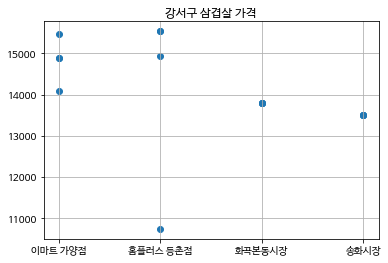

In [ ]:
x=df_my['시장/마트 이름']
y=df_my['가격(원)']
plt.scatter(x,y)
plt.grid()
plt.title('강서구 삼겹살 가격')
plt.show()

구이름:관악구
          시장/마트 이름       품목 이름 실판매규격  가격(원)
2879        원당종합시장  돼지고기(생삼겹살)  600g  14800
2889        원당종합시장  돼지고기(생삼겹살)  600g  15800
2897        원당종합시장  돼지고기(생삼겹살)  600g  15800
2931        원당종합시장  돼지고기(생삼겹살)  600g  15800
2978    신원시장(신림1동)  돼지고기(생삼겹살)  600g  16000
2996    신원시장(신림1동)  돼지고기(생삼겹살)  600g  16000
3004    신원시장(신림1동)  돼지고기(생삼겹살)  600g  16000
3020    신원시장(신림1동)  돼지고기(생삼겹살)  600g  16000
3212     롯데백화점 관악점  돼지고기(생삼겹살)  600g  22800
3231     롯데백화점 관악점  돼지고기(생삼겹살)  600g  14400
3240     롯데백화점 관악점  돼지고기(생삼겹살)  600g  22800
3262     롯데백화점 관악점  돼지고기(생삼겹살)  600g  22800
3383        세이브 마트  돼지고기(생삼겹살)  600g  13800
3407        세이브 마트  돼지고기(생삼겹살)  600g  13800
3418        세이브 마트  돼지고기(생삼겹살)  600g  13800
3429        세이브 마트  돼지고기(생삼겹살)  600g  13800
5503  관악신사시장(신림4동)  돼지고기(생삼겹살)  600g  14000
5507  관악신사시장(신림4동)  돼지고기(생삼겹살)  600g  14000
5517  관악신사시장(신림4동)  돼지고기(생삼겹살)  600g  14000
5533  관악신사시장(신림4동)  돼지고기(생삼겹살)  600g  14000 



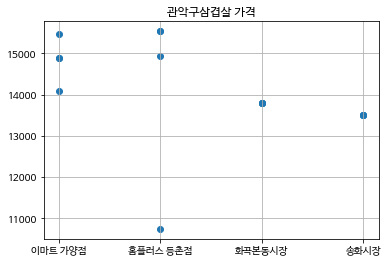

In [ ]:
gu=input('구이름:')
df_pork_gu=df_pork[df_pork['자치구 이름']==gu][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]
print(df_pork_gu,'\n')
x=df_my['시장/마트 이름']
y=df_my['가격(원)']
plt.scatter(x,y)
plt.grid()
plt.title(gu + '삼겹살 가격')
plt.show()

# 마트 지점별 삼겹살 가격

지점:마트


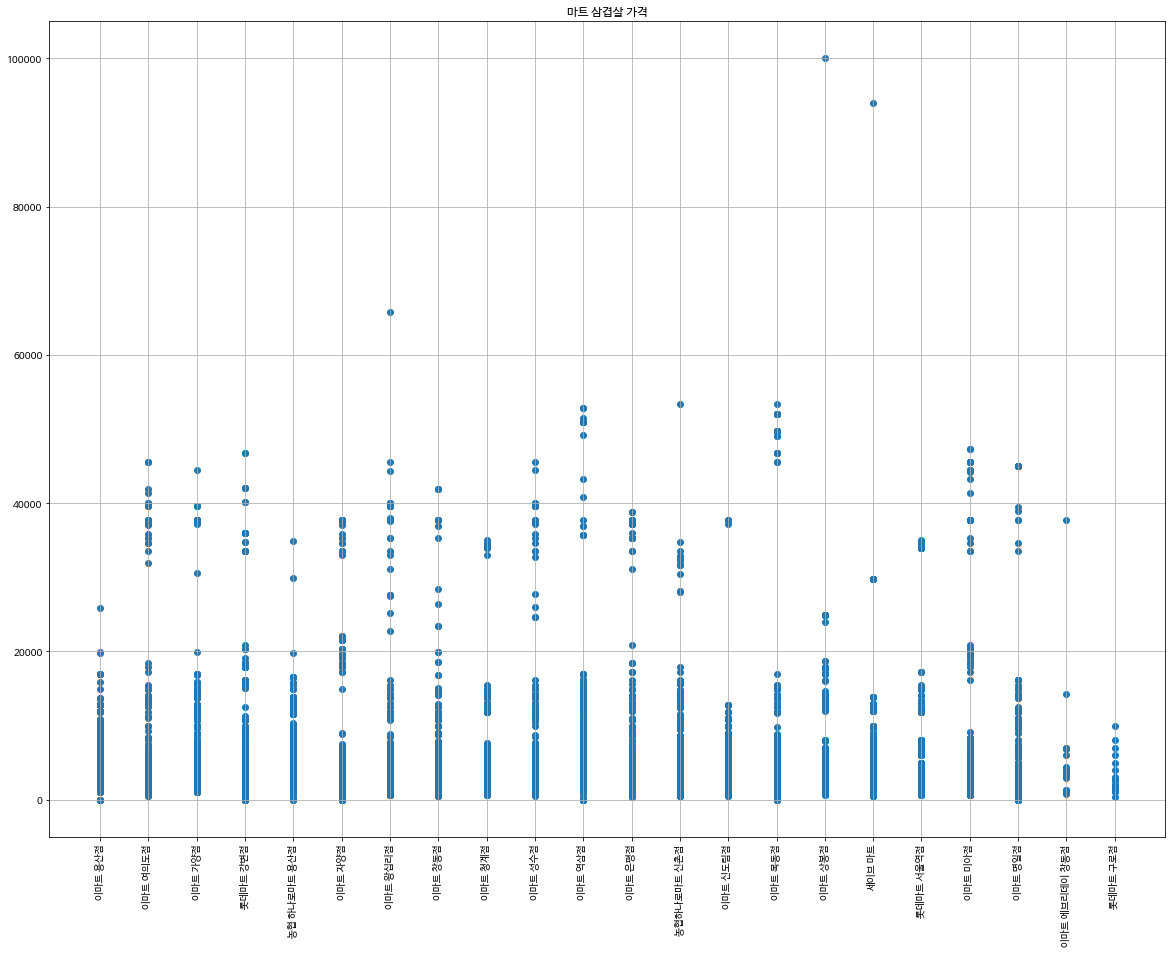

In [ ]:
# input으로 백화점을 넣으면 백화점 이름과 삼겹살 가격 출력
de=input('지점:')
df_de=df[df['시장/마트 이름'].str.contains(de)][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]
x=df_de['시장/마트 이름']
y=df_de['가격(원)']
plt.figure(figsize=(20,15))
plt.scatter(x,y)
plt.grid()
plt.title(de + ' ' + '삼겹살 가격')
plt.xticks(rotation=90)
plt.show()

# 달걀 가격 분석
* 2021-6 데이터 이용
* 달걀 30구 평균 가격
* 최고가 & 최저가

* 우리동네 달걀가격
* 우리구 달걀가격
* 시각화

* 마트지점별 달걀 가격
* 마트지점별 달걀 가격 시각화

In [ ]:
df_egg=df[(df['년도-월']=='2021-06') & 
          (df['품목 이름'].str.contains('달걀')) &
          (df['품목 이름'].str.contains('30'))]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [ ]:
df_egg['가격(원)'].mean()

9006.852713178294

In [ ]:
df_egg['가격(원)'].max()

75000

In [ ]:
df_egg['가격(원)'].min()

0

구이름: 강서구
      시장/마트 이름    품목 이름       실판매규격  가격(원)
62     이마트 가양점  달걀(30개)  30개(1800g)   6900
82     이마트 가양점  달걀(30개)  30개(1800g)   6900
138    이마트 가양점  달걀(30개)  30개(1800g)   6900
152    이마트 가양점  달걀(30개)  30개(1800g)   6900
643   홈플러스 등촌점  달걀(30개)  30개(1800g)   6900
5950    화곡본동시장  달걀(30개)  30개(1860g)  10000
5970    화곡본동시장  달걀(30개)  30개(1860g)  10000
5987    화곡본동시장  달걀(30개)  30개(1860g)   9500
5989    화곡본동시장  달걀(30개)  30개(1860g)   9500
6067      송화시장  달걀(30개)  30개(1860g)  10000
6074      송화시장  달걀(30개)  30개(1860g)  10000
6101      송화시장  달걀(30개)  30개(1860g)  10000
6117      송화시장  달걀(30개)  30개(1860g)  10000
6535  홈플러스 등촌점  달걀(30개)  30개(1800g)   6950
6540  홈플러스 등촌점  달걀(30개)  30개(1800g)   6900
6541  홈플러스 등촌점  달걀(30개)  30개(1800g)   7790 



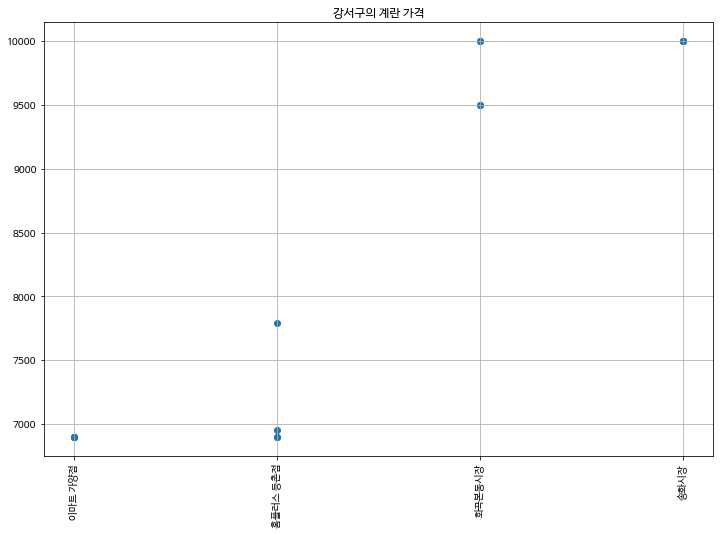

In [ ]:
gu=input('구이름: ')
df_egg_gu=df_egg[df_egg['자치구 이름']==gu][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]
print(df_egg_gu, '\n')
x_gu=df_egg_gu['시장/마트 이름']
y_gu=df_egg_gu['가격(원)']
plt.figure(figsize=(12,8))
plt.scatter(x_gu,y_gu)
plt.grid()
plt.title(gu + '의 계란 가격')
plt.xticks(rotation=90)
plt.show()

지점:백화점
        시장/마트 이름    품목 이름        실판매규격  가격(원)
28     현대백화점 미아점  달걀(30개)          30개      0
99     롯데백화점 미아점  달걀(30개)        1800g  12800
1002   롯데백화점 강남점  달걀(30개)          30개  17000
1016   롯데백화점 강남점  달걀(30개)          30개  17000
1044   롯데백화점 강남점  달걀(30개)          30개  17000
1054   롯데백화점 강남점  달걀(30개)          30개  17000
1139  롯데백화점 청량리점  달걀(30개)          30개      0
1227   NC백화점 불광점  달걀(30개)   30개(1800g)   8590
1535   NC백화점 불광점  달걀(30개)   30개(1.8kg)   8990
1821       롯데백화점  달걀(30개)   30개(1560g)  15800
1866   NC백화점 불광점  달걀(30개)   30개(1.8kg)   8990
1878   NC백화점 불광점  달걀(30개)   30개(1800g)   8990
1977   롯데백화점 노원점  달걀(30개)          30개  11000
2572       태평백화점  달걀(30개)   30개(1560g)   9800
2578       롯데백화점  달걀(30개)   30개(1560g)  18960
2596       롯데백화점  달걀(30개)   30개(1560g)  18960
2629       태평백화점  달걀(30개)   30개(1560g)   8800
2664       태평백화점  달걀(30개)   30개(1560g)  11800
2666       롯데백화점  달걀(30개)   30개(1560g)  11800
2685       태평백화점  달걀(30개)   30개(1560g)   9800
2749  롯데백화점 영등포점  달걀(30개)  

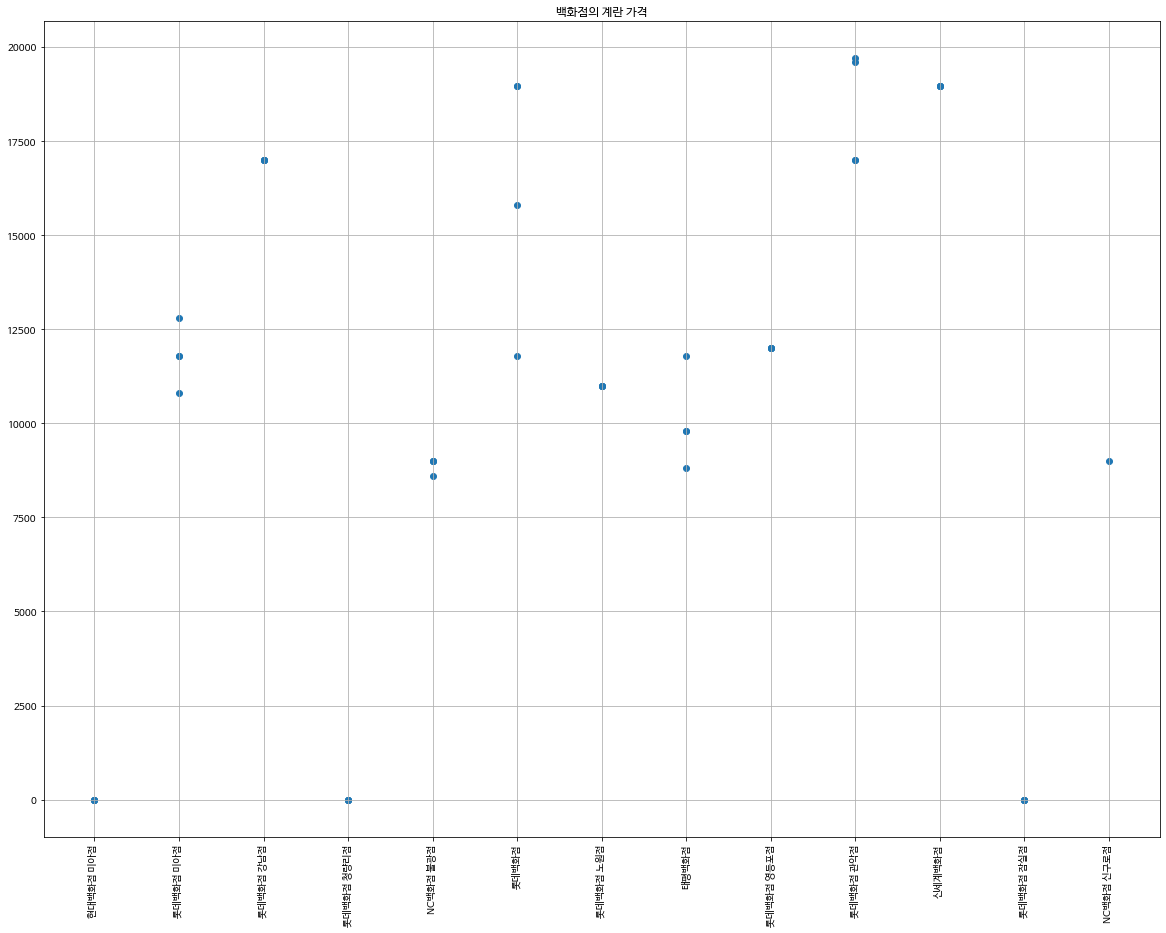

In [ ]:
c=input('지점:')
df_egg_c=df_egg[df_egg['시장/마트 이름'].str.contains(c)][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]
print(df_egg_c, '\n')
x_c=df_egg_c['시장/마트 이름']
y_c=df_egg_c['가격(원)']
plt.figure(figsize=(20,15))
plt.scatter(x_c,y_c)
plt.grid()
plt.title(c + '의 계란 가격')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_egg_c

11       True
28      False
43      False
52       True
62      False
        ...  
6749     True
6756     True
6771     True
6779    False
6799     True
Name: 시장/마트 이름, Length: 387, dtype: bool

In [ ]:
%%shell
jupyter nbconvert --to html /content/Egg.ipynb